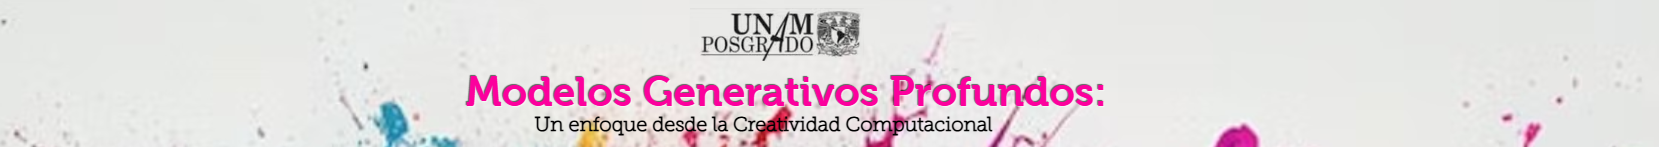

# Implementación de LeNet-5 para MNIST


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, utils, datasets, Sequential

## 1. Preparar los datos

**1.1 Descargar el dataset**

In [6]:

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [7]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


**1.2 Escalar los valores de las imágenes**


In [8]:
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255.0

**1.3 Codificar las etiquetas con one-hot-encoding.**


In [9]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

Veamos las primeras 10 imágenes del conjunto de entrenamiento junto con sus etiquetas codificadas usando one-hot encoding.

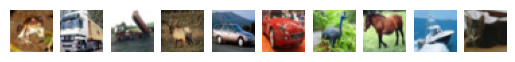

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [10]:
images = x_train[:10]

plt.figure()
for i in range(0, len(images)):
  plt.subplot(1, 10, i + 1)
  plt.imshow(images[i])
  plt.axis("off")

plt.show()

print(y_train[:10])

## 2. Construir el modelo <a name="build"></a>

In [12]:
NUM_CLASSES = 10

model = Sequential()
model.add(layers.Input(shape=(32, 32, 3)))
# Convolutional Layer 1
# 10 filters, kernel size 4x4x3, stride 2, padding 'same'
model.add(layers.Conv2D(10, (4, 4), strides=(2, 2), padding='same', activation='relu'))
# Convolutional Layer 2
# 20 filters, kernel size 3x3x10, stride 2, padding 'same'
model.add(layers.Conv2D(20, (3, 3), strides=(2, 2), padding='same', activation='relu'))
# Output size after Conv Layer 2: 8x8x20
# Flatten Layer
model.add(layers.Flatten())
# Dense Layer (Fully Connected Layer) 10 Classes
model.add(layers.Dense(NUM_CLASSES, activation='softmax'))

2025-09-10 00:13:14.341772: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-09-10 00:13:14.341958: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-09-10 00:13:14.341978: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
I0000 00:00:1757484794.342471 4095055 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1757484794.342692 4095055 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Podemos utilizar el método <b>model.summary()</b> para inspeccionar la forma de la red en cada capa.

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 16, 16, 10)     │           490 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 20)       │         1,820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,120 (59.06 KB)

 Trainable params: 15,120 (59.06 KB)

 Non-trainable params: 0 (0.00 B)

## 3. Compilar el modelo <a name="compile"></a>

In [15]:
opt = optimizers.SGD(learning_rate=0.1)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

## 4. Entrenar el modelo <a name="train"></a>

In [16]:
model.fit(x_train, y_train, batch_size=128, epochs=10, shuffle=True)

Epoch 1/10


2025-09-10 00:13:48.003246: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.2785 - loss: 2.0100
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4049 - loss: 1.7009
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4745 - loss: 1.4858
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5085 - loss: 1.3915
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5308 - loss: 1.3293
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5469 - loss: 1.2887
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5582 - loss: 1.2585
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5693 - loss: 1.2265
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5777 - loss: 1.2014
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5885 - loss: 1.1738


## 5. Evaluar el modelo

In [17]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5380 - loss: 1.2770


[1.2769805192947388, 0.5379999876022339]

Podemos observar algunas de las predicciones en el conjunto de prueba utilizando el <b>método predict</b>: <br>


In [18]:
CLASSES = np.array(
    [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
    ]
)

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Podemos visualizar algunas de las imágenes junto con sus etiquetas y predicciones utilizando el siguiente código:

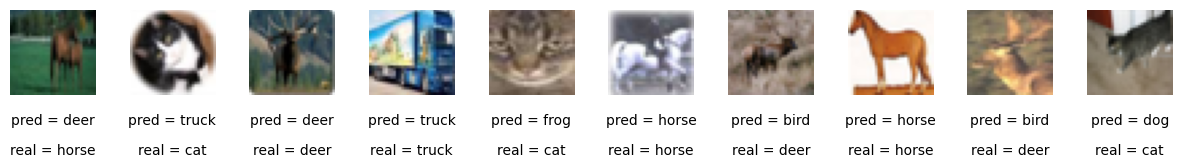

In [19]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]

    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")

    ax.text(
        0.5, -0.35, f"pred = {preds_single[idx]}",
        fontsize=10, ha="center", transform=ax.transAxes
    )
    ax.text(
        0.5, -0.7, f"real = {actual_single[idx]}",
        fontsize=10, ha="center", transform=ax.transAxes
    )

    # Mostrar las 10 imágenes
    ax.imshow(img, cmap="gray")


##6. Mostremos la variabilidad de las imágenes

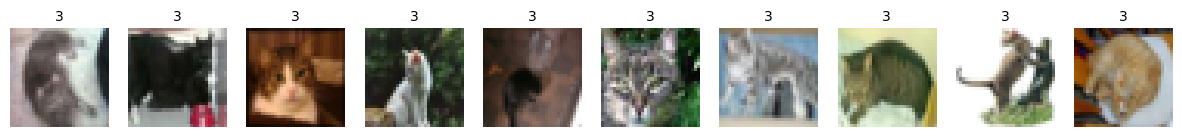

In [20]:
# Filtrar índices de dígito = 3
#indices_3 = np.where(y_train == 3)[0]
indices_3 = np.where(np.argmax(y_train, axis=1) == 3)[0]

# Elegir 10 al azar
sample_indices = np.random.choice(indices_3, 10, replace=False)

# Mostrar imágenes
fig, axes = plt.subplots(1, 10, figsize=(15, 2))
for i, idx in enumerate(sample_indices):
    axes[i].imshow(x_train[idx], vmin=0, vmax=1)
    axes[i].axis("off")
    axes[i].set_title("3", fontsize=10)
plt.show()


## 7. ¿Qué pasa si transladamos las imágenes de prueba cuatro pixeles abajo y  la derecha y un pixel abajo?

Hagámoslo primero con una sola imagen aleatoria.

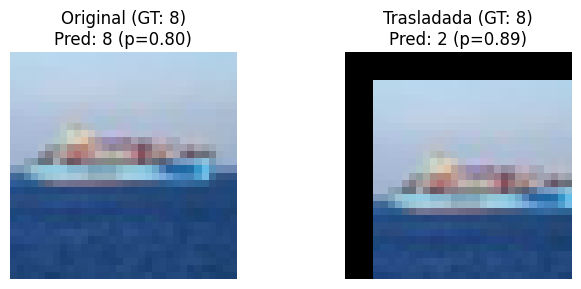

In [22]:
from scipy.ndimage import shift

# 1) Selecciona una imagen aleatoria del conjunto de prueba
idx = np.random.randint(0, len(x_test))
img = x_test[idx]

# 2) Traslada la imagen (ejemplo: 4 pixeles abajo, 4 derecha)
translated_img = shift(img, shift=(4, 4, 0), mode="constant", cval=0.0, order=0)

# 3) Preparar batch con original y trasladada: (2,32,32,3)
input_imgs = np.stack([img, translated_img], axis=0).astype("float32")

# 4) Predicción
input_tensor = tf.convert_to_tensor(input_imgs, dtype=tf.float32)
probs = model.predict_on_batch(input_tensor)   # numpy array (2,10)
pred_labels = np.argmax(probs, axis=1)

# 5) Recuperar etiqueta real
true_label = int(np.argmax(y_test[idx]))

# 6) Mostrar lado a lado
fig, axes = plt.subplots(1, 2, figsize=(7, 3))

title0 = f"Original (GT: {true_label})\nPred: {pred_labels[0]} (p={probs[0, pred_labels[0]]:.2f})"
title1 = f"Trasladada (GT: {true_label})\nPred: {pred_labels[1]} (p={probs[1, pred_labels[1]]:.2f})"

axes[0].imshow(img)
axes[0].set_title(title0)
axes[0].axis("off")

axes[1].imshow(translated_img)
axes[1].set_title(title1)
axes[1].axis("off")

plt.tight_layout()
plt.show()


Traslademos ahora con todas las imágenes de x_test y veamos cómo cambia el desempeño del modelo.

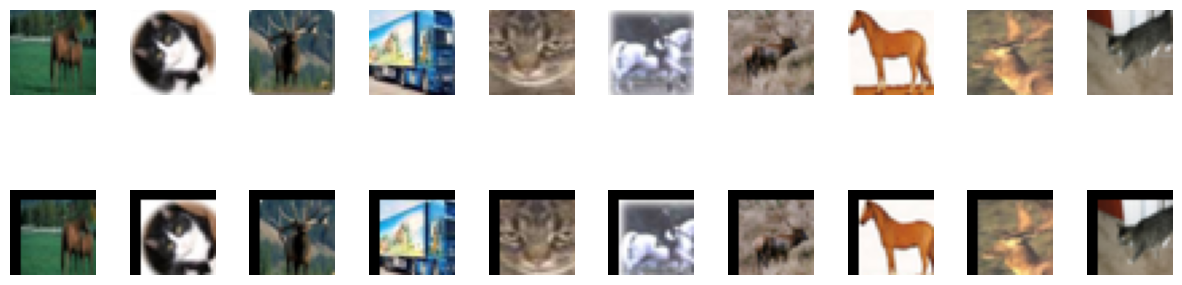

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2603 - loss: 2.4266


[2.426612138748169, 0.26030001044273376]

In [26]:
import numpy as np
from scipy.ndimage import shift

# Aplicar shift a todas las imágenes
x_test_shifted = np.stack([
    shift(img, shift=(4, 4, 0), mode="constant", cval=0.0, order=0)
    for img in x_test
], axis=0)

# Muestra 10 imágenes aleatorias: arriba originales, abajo trasladadas
fig, axes = plt.subplots(2, n_to_show, figsize=(15, 4))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    # Imagen original
    axes[0, i].imshow(x_test[idx].squeeze(), cmap="gray")
    axes[0, i].axis("off")

    # Imagen trasladada
    axes[1, i].imshow(x_test_shifted[idx].squeeze(), cmap="gray")
    axes[1, i].axis("off")

plt.show()


# --- Pasar al modelo ---
model.evaluate(x_test_shifted, y_test)